# Data Exploration 
---
Based on the clusters, I have picked a country from each cluster and here, I will explore and analyse data of these selected countries. 

**Contents:**
- [Import libraries and data](#Import-libraries-and-data) 
- [Scope](#Scope)
- [Sanity check](#Sanity-check)
- [24H changes in solar energy potential](#24H-changes-in-solar-energy-potential)
- [Distribution of solar energy potential](#Distribution-of-solar-energy-potential)
- [Seasonality in solar energy potential](#Seasonality-in-solar-energy-potential)

### Import libraries and data 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
#read clean data
solar_ctry = pd.read_csv('../data/solar-ctry-clean.csv')
solar_nuts = pd.read_csv('../data/solar-nuts-clean.csv')

#preview data
print(" Top 5 rows of solar_ctry ".center(50, "-"))
display(solar_ctry.head())
print(f'Shape of solar_ctry : {solar_ctry.shape}')
print(" Data types in solar_ctry ".center(50, "-"))
print(solar_ctry.dtypes)
print()
print(" Top 5 rows of solar_nuts ".center(50, "-"))
display(solar_nuts.head())
print(f'Shape of solar_nuts : {solar_nuts.shape}')
print(" Data types in solar_nuts ".center(50, "-"))
print(solar_nuts.dtypes)

------------ Top 5 rows of solar_ctry ------------


,Austria,Belgium,Bulgaria,Switzerland,Cyprus,Czech Republic,Germany,Denmark,Estonia,Spain,Finland,France,Greece,Croatia,Hungary,Ireland,Italy,Lithuania,Luxembourg,Latvia,Netherlands,Norway,Poland,Portugal,Romania,Slovenia,Slovakia,Sweden,United Kingdom,time,hour,week,month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 02:00:00,2,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 03:00:00,3,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 04:00:00,4,1,1


Shape of solar_ctry : (262968, 33)
------------ Data types in solar_ctry ------------
Austria           float64
Belgium           float64
Bulgaria          float64
Switzerland       float64
Cyprus            float64
Czech Republic    float64
Germany           float64
Denmark           float64
Estonia           float64
Spain             float64
Finland           float64
France            float64
Greece            float64
Croatia           float64
Hungary           float64
Ireland           float64
Italy             float64
Lithuania         float64
Luxembourg        float64
Latvia            float64
Netherlands       float64
Norway            float64
Poland            float64
Portugal          float64
Romania           float64
Slovenia          float64
Slovakia          float64
Sweden            float64
United Kingdom    float64
time               object
hour                int64
week                int64
month               int64
dtype: object

------------ Top 5 rows of solar_nuts ---

,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4,time,hour,week,month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Shape of solar_nuts : (262968, 264)
------------ Data types in solar_nuts ------------
AT11        float64
AT21        float64
AT12        float64
AT31        float64
AT32        float64
AT22        float64
AT33        float64
AT34        float64
AT13        float64
BE21        float64
BE31        float64
BE32        float64
BE33        float64
BE22        float64
BE34        float64
BE35        float64
BE23        float64
BE10        float64
BE24        float64
BE25        float64
BG32        float64
BG33        float64
BG31        float64
BG34        float64
BG41        float64
BG42        float64
CZ06        float64
CZ03        float64
CZ08        float64
CZ01        float64
CZ05        float64
CZ04        float64
CZ02        float64
CZ07        float64
DEA5        float64
DE30        float64
DE40        float64
DE91        float64
DE50        float64
DED1        float64
DE71        float64
DEE1        float64
DEA4        float64
DED2        float64
DEA1        float64
DE13        f

Getting `solar_ctry` data ready by changing time to datetime format and getting only the selected countries.

In [3]:
#get columns for only countries selected and the time columns
solar_analysis = solar_ctry[['Netherlands','Croatia','Finland','Spain','Norway','time','hour','week','month']]
#change time to datetime format
solar_analysis['time'] = pd.to_datetime(solar_analysis['time'])
#preview
solar_analysis.head()

,Netherlands,Croatia,Finland,Spain,Norway,time,hour,week,month
0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,0,1,1
1,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1,1,1
2,0.0,0.0,0.0,0.0,0.0,1986-01-01 02:00:00,2,1,1
3,0.0,0.0,0.0,0.0,0.0,1986-01-01 03:00:00,3,1,1
4,0.0,0.0,0.0,0.0,0.0,1986-01-01 04:00:00,4,1,1


Getting `solar_nuts` data ready by changing time to datetime format.

In [4]:
#change time to datatime format
solar_nuts['time'] = pd.to_datetime(solar_nuts['time'])
#preview
solar_nuts.head()

,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4,time,hour,week,month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Scope
Considering that 30 years' worth of data is voluminous and computing intensive, I'll analyse just the last 10 years of data for the selected countries and for NUTS data.

In [5]:
#obtain just last 10 years of data for analysis
last_10_years = -24*365*10

solar_10y = solar_analysis[last_10_years:]
#preview
print(" SOLAR_CTRY ".center(70,"="))
print(" Top 5 rows of last 10 years ".center(70,"-"))
display(solar_10y.head())
print(" Last 5 rows of last 10 years ".center(70,"-"))
display(solar_10y.tail())
print(f'Shape of data : {solar_10y.shape}')

solar_nuts_10y = solar_nuts[last_10_years:]
print(" SOLAR_NUTS ".center(70,"="))
print(" Top 5 rows of last 10 years ".center(70,"-"))
display(solar_nuts_10y.head())
print(" Last 5 rows of last 10 years ".center(70,"-"))
display(solar_nuts_10y.tail())
print(f'Shape of data : {solar_nuts_10y.shape}')

============================= SOLAR_CTRY =============================
-------------------- Top 5 rows of last 10 years ---------------------


,Netherlands,Croatia,Finland,Spain,Norway,time,hour,week,month
175368,0.0,0.0,0.0,0.0,0.0,2006-01-03 00:00:00,0,1,1
175369,0.0,0.0,0.0,0.0,0.0,2006-01-03 01:00:00,1,1,1
175370,0.0,0.0,0.0,0.0,0.0,2006-01-03 02:00:00,2,1,1
175371,0.0,0.0,0.0,0.0,0.0,2006-01-03 03:00:00,3,1,1
175372,0.0,0.0,0.0,0.0,0.0,2006-01-03 04:00:00,4,1,1


-------------------- Last 5 rows of last 10 years --------------------


,Netherlands,Croatia,Finland,Spain,Norway,time,hour,week,month
262963,0.0,0.0,0.0,0.0,0.0,2015-12-31 19:00:00,19,53,12
262964,0.0,0.0,0.0,0.0,0.0,2015-12-31 20:00:00,20,53,12
262965,0.0,0.0,0.0,0.0,0.0,2015-12-31 21:00:00,21,53,12
262966,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,53,12
262967,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,53,12


Shape of data : (87600, 9)
============================= SOLAR_NUTS =============================
-------------------- Top 5 rows of last 10 years ---------------------


,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4,time,hour,week,month
175368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 00:00:00,0,1,1
175369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 01:00:00,1,1,1
175370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

-------------------- Last 5 rows of last 10 years --------------------


,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4,time,hour,week,month
262963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 19:00:00,19,53,12
262964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 20:00:00,20,53,12
262965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Shape of data : (87600, 264)


### Sanity check
Before further analysis on the data, I perform a sanity check on the energy potential of the data. There should not be any negative values or values >1 for energy potential. 

In [6]:
#sanity check on the numbers 
print(f"SOLAR_CTRY".center(50,"="))
print(f"Negative values".center(50,"-"))
cols_to_check = ['Netherlands','Croatia','Finland','Spain','Norway']
print(solar_10y.where(solar_10y[cols_to_check]<0).count())
print("")
print(f"Values > 1".center(50,"-"))
cols_to_check = ['Netherlands','Croatia','Finland','Spain','Norway']
print(solar_10y.where(solar_10y[cols_to_check]>1).count())

print(f"SOLAR_NUTS".center(50,"="))
# when selecting columns, I refer to the NUTS2 system for these selected countries
# Netherlands : NL
# Croatia : HR
# Finland : FI
# Spain : ES
# Norway : NO
cols_to_check = ['NL','HR','FI','ES','NO']
solar_nuts_10y_selected = solar_nuts_10y[['time','hour','week','month']]
countries = []
for c in cols_to_check:
    try:
        df = solar_nuts_10y.filter(regex=c)
        countries.append(df)
    except:
        continue
countries = pd.concat(countries, axis=1)
solar_nuts_10y = pd.concat([solar_nuts_10y_selected,countries], axis=1) #HR data is not available
print(f"Negative values".center(50,"-"))
cols_to_check_nuts = [c for c in solar_nuts_10y.columns if c not in ['time','hour','week','month']]
print(solar_nuts_10y.where(solar_nuts_10y[cols_to_check_nuts]<0).count())
print("")
print(f"Values > 1".center(50,"-"))
print(solar_nuts_10y.where(solar_nuts_10y[cols_to_check_nuts]>1).count())

====================SOLAR_CTRY====================
-----------------Negative values------------------
Netherlands    0
Croatia        0
Finland        0
Spain          0
Norway         0
time           0
hour           0
week           0
month          0
dtype: int64

--------------------Values > 1--------------------
Netherlands    0
Croatia        0
Finland        0
Spain          0
Norway         0
time           0
hour           0
week           0
month          0
dtype: int64
====================SOLAR_NUTS====================
-----------------Negative values------------------
time     0
hour     0
week     0
month    0
NL13     0
NL23     0
NL12     0
NL22     0
NL11     0
NL42     0
NL41     0
NL32     0
NL21     0
NL31     0
NL34     0
NL33     0
FI20     0
FI1C     0
FI1D     0
FI1B     0
FI19     0
ES61     0
ES24     0
ES12     0
ES13     0
ES41     0
ES42     0
ES51     0
ES30     0
ES52     0
ES43     0
ES11     0
ES53     0
ES23     0
ES22     0
ES21     0
ES62     0
NO04 

No erroneous datanoted.

### 24H changes in solar energy potential

In [7]:
#track how solar energy potential changes in a 24H period for each country 
def solar_hourly(df, title, ylabel):
    '''function that creates a plot based on hourly data'''
    plt.figure(figsize=(8,6))
    exclude_cols = ['hour', 'week','month','time']
    cols_to_plot = [x for x in df.columns if x not in exclude_cols]
    for column in cols_to_plot:
        sns.lineplot(data = df, x='hour', y=column, label=column)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

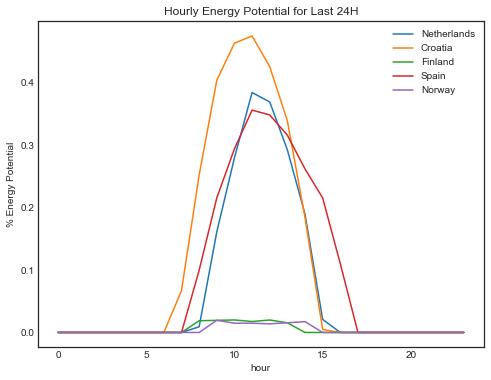

In [8]:
#plot a 24H period
solar_hourly(solar_10y[-24:], "Hourly Energy Potential for Last 24H", "% Energy Potential")

From plot above we see that :
- There is only energy potential between 0600H to about 1700H, which is daylight period. This also means that there is no energy potential during nighttime. This makes sense since there is no sunlight at nighttime.
- Croatia has the highest energy potential while Norway and Finland has the lowest energy potential. 
- The peak across all countries here are at the noon hour. 

### Distribution of solar energy potential
Now let's look at the distribution of energy potential across these countries. We will focus on period between 0600H and 1700H. We'd expect that the peak energy potential will not be as common as those in the mid-range. 

In [9]:
# look at distribution of energy potential for these countries
def solar_distr_daylight_hourly(df, title, ylabel, xlabel):
    '''function that creates a distribution plot based on hourly data'''
    plt.figure(figsize=(12,8)) 
    df1 = df[(df['hour']>6)&(df['hour']<17)] #get just the hours within 0600 and 1700 
    exclude_cols = ['hour','week','month','time'] #set columns to exclude for plotting
    cols_to_plot = [x for x in df1.columns if x not in exclude_cols] #set columns to plot
    for column in cols_to_plot:
        sns.distplot(df1[df1[column]!=0][column], label=column, hist=False) #distribution plot
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(0,200)
    plt.xlabel(xlabel)
    plt.xlim(-0.1,1)
    plt.legend()
    plt.show()

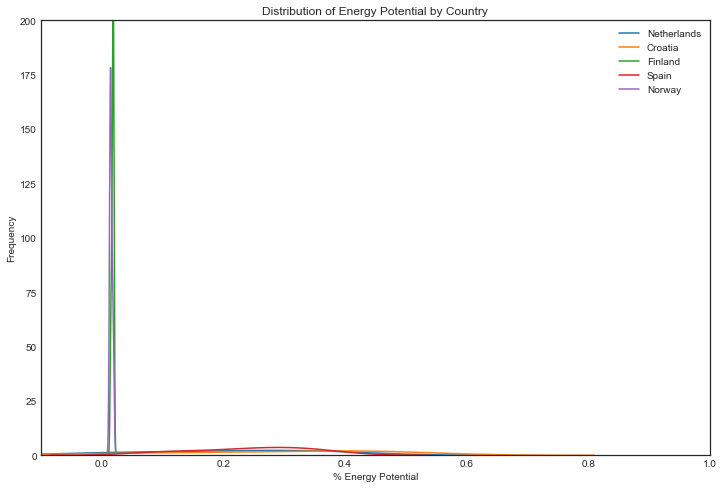

In [10]:
solar_distr_daylight_hourly(solar_10y[-24:], "Distribution of Energy Potential by Country", "Frequency", "% Energy Potential")

- Norway and Finland's peak is very close to 0% energy potential. This suggests that it is not wise for these countries to rely heavily on solar energy for power. 
- The rest of the countries have pretty even distribution from 0% energy potential to about 0.6%, with peaks ranging from 0.3% to 0.5% energy potential. 
- Spain seems to have the most area exposed which translates to greater energy potential. This corroborates with the earlier which shows that Spain has the most daylight hours compated to other countries. 

### Seasonality in solar energy potential
With the changing seasons, we would also expect seasonality in exposure to sun throughout the years. With Spain's data, I look at the energy potential changes throughout the last 10 years. 

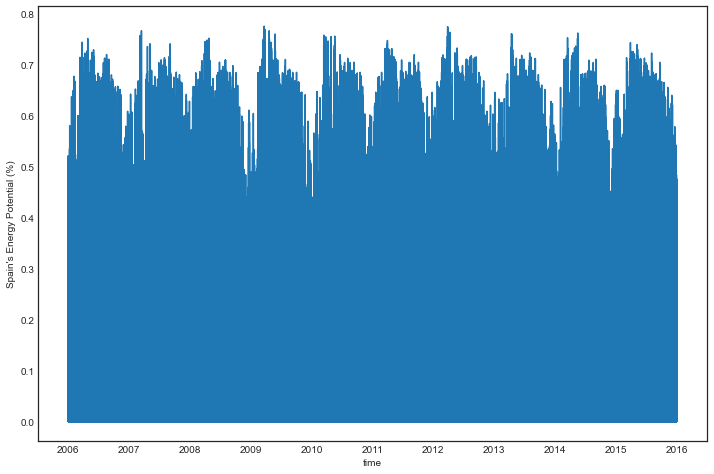

In [78]:
#plot Spain's energy potential from 2005 to 2015 
plt.figure(figsize=(12,8))
sns.lineplot(x=solar_10y['time'], y=solar_10y['Spain'], palette='teal')
plt.ylabel("Spain's Energy Potential (%)")
plt.show()

- There is obvious seasonality across the years, where there are peaks and troughs at relatively consistent times of the year.
- This consistency may make it easier for prediction models to predict solar energy generation in future

View the energy potential for Spain using NUTS data. We should be expecting the same seasonality.

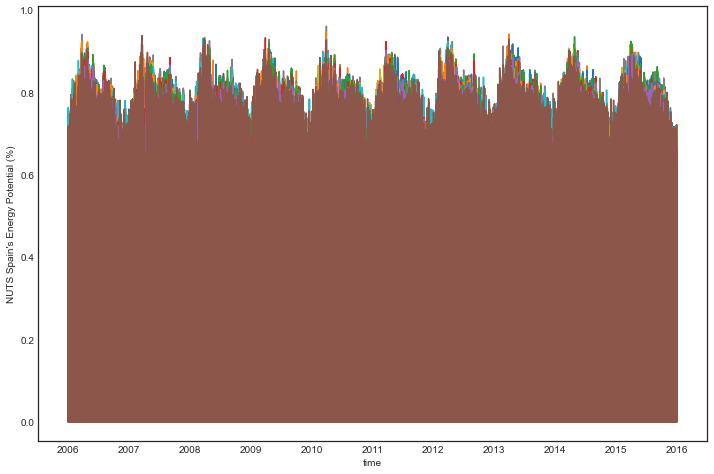

In [79]:
# view seasonality using NUTS data. 
plt.figure(figsize=(12,8))
cols_to_plot = [c for c in solar_nuts_10y.columns if 'ES' in c]
for i in cols_to_plot:
    sns.lineplot(x=solar_nuts_10y['time'], y=solar_nuts_10y[i], palette='teal')
plt.ylabel("NUTS Spain's Energy Potential (%)")
plt.show()

- There is similar seasonality, as expected

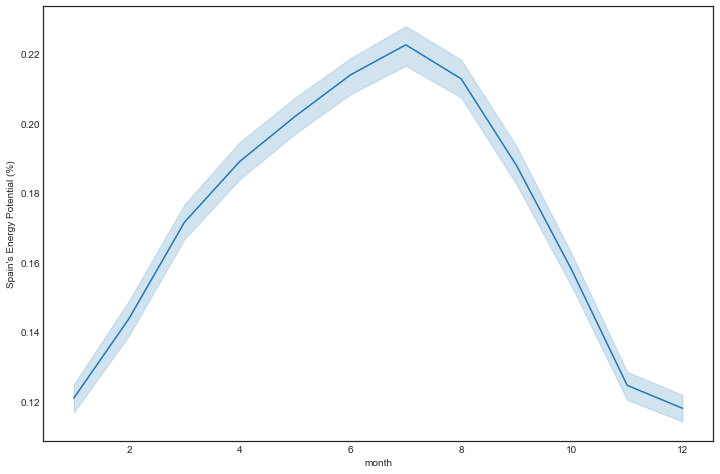

In [80]:
#plot Spain's energy potential from 2005 to 2015 
plt.figure(figsize=(12,8))
sns.lineplot(x=solar_10y['month'], y=solar_10y['Spain'], palette='teal')
plt.ylabel("Spain's Energy Potential (%)")
plt.show()

- Looking at how energy potential changes within a year, for Spain, hottest months of the year are between **April to August**, during spring and summer. The coldest months (with lack of sunlight) are from **December to March**, which is the winter season. 

- The fluctuations we see in the earlier visual is due to the change in solar energy strength through out the year. 

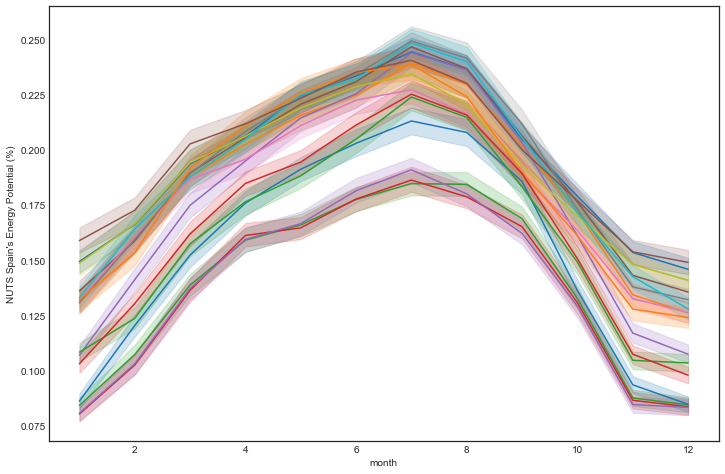

In [81]:
#plot Spain's energy potential from 2005 to 2015 using NUTS data
plt.figure(figsize=(12,8))
cols_to_plot = [c for c in solar_nuts_10y.columns if 'ES' in c]
for i in cols_to_plot:
    sns.lineplot(x=solar_nuts_10y['month'], y=solar_nuts_10y[i], palette='teal')
plt.ylabel("NUTS Spain's Energy Potential (%)")
plt.show()

- As expected we see the same trend across all regions of Spain.

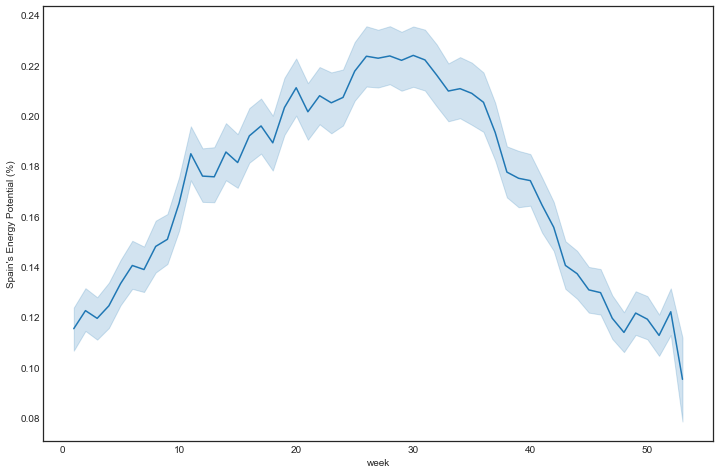

In [82]:
#plot Spain's energy potential from 2005 to 2015 
plt.figure(figsize=(12,8))
sns.lineplot(x=solar_10y['week'], y=solar_10y['Spain'], palette='teal')
plt.ylabel("Spain's Energy Potential (%)")
plt.show()

- Looking at how the potential energy changes within the year on a weekly basis, here we see that there are some fluctuations across weeks. However, these fluctuations are not consistent across all weeks of the year.

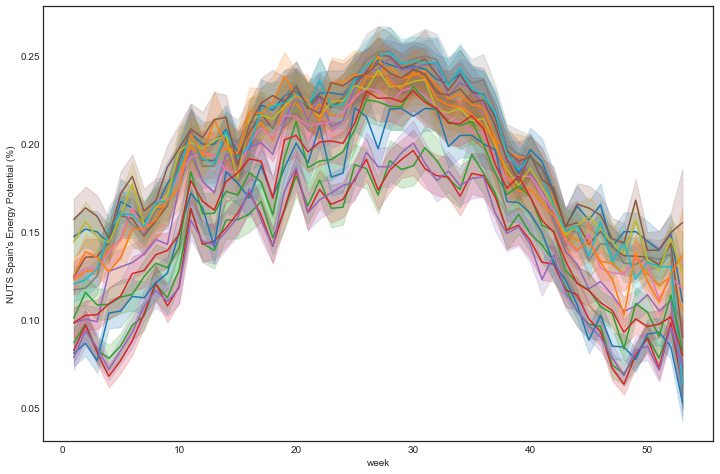

In [83]:
#plot Spain's energy potential from 2005 to 2015 
plt.figure(figsize=(12,8))
cols_to_plot = [c for c in solar_nuts_10y.columns if 'ES' in c]
for i in cols_to_plot:
    sns.lineplot(x=solar_nuts_10y['week'], y=solar_nuts_10y[i], palette='teal')
plt.ylabel("NUTS Spain's Energy Potential (%)")
plt.show()

- Weekly trends are also pretty similar across all regions of Spain.

### Scope : Spain
Since we've looked at Spain, I'll attempt to predict future energy potential for this country.

In [84]:
#get dataframe with just important fields
spain_ep_ctry = solar_10y[['Spain','time']]
#due to seasonality year on year, get week of year, day of year
spain_ep_ctry['year'] = spain_ep_ctry['time'].dt.year
spain_ep_ctry['week_of_year'] = spain_ep_ctry['time'].dt.weekofyear
spain_ep_ctry['day_of_year'] = spain_ep_ctry['time'].dt.dayofyear
spain_ep_ctry['hour'] = spain_ep_ctry['time'].dt.hour
#preview
spain_ep_ctry.head()

,Spain,time,year,week_of_year,day_of_year,hour
175368,0.0,2006-01-03 00:00:00,2006,1,3,0
175369,0.0,2006-01-03 01:00:00,2006,1,3,1
175370,0.0,2006-01-03 02:00:00,2006,1,3,2
175371,0.0,2006-01-03 03:00:00,2006,1,3,3
175372,0.0,2006-01-03 04:00:00,2006,1,3,4


In [85]:
#save out data
spain_ep_ctry.to_csv("../data/spain-energy-potential-country.csv", index=False)

We also save the data obtained with NUTS. 

In [86]:
# get just Spain's data from NUTS system
spain_ep_nuts = solar_nuts_10y[sorted([c for c in solar_nuts_10y.columns if 'ES' in c])]
cols_to_add = ['time','hour','week','month']
for x in cols_to_add:
    spain_ep_nuts[x] = solar_nuts_10y[x]

In [87]:
spain_ep_nuts.head()

,ES11,ES12,ES13,ES21,ES22,ES23,ES24,ES30,ES41,ES42,ES43,ES51,ES52,ES53,ES61,ES62,time,hour,week,month
175368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 00:00:00,0,1,1
175369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 01:00:00,1,1,1
175370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 02:00:00,2,1,1
175371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 03:00:00,3,1,1
175372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-03 04:00:00,4,1,1


In [88]:
#save out data
spain_ep_nuts.to_csv("../data/spain-energy-potential-nuts.csv", index=False)

Refer to [this notebook](04-modeling-forecast.ipynb) for solar generation forecast in Spain!